In [2]:
print("NAME:- RAMESH BHUTKA")
print("SAP ID:- 5300419003")

NAME:- RAMESH BHUTKA
SAP ID:- 5300419003


In [4]:
import datetime
print(datetime.datetime.now())

2021-05-05 14:06:49.725455


# practical-4

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="practical-4")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-4


'https://jovian.ai/rameshbhutka11/practical-4'

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
# load the dataset
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

#### Number of Instances: 768

#### Number of Attributes: 8 plus class 

Attribute:
   - Number of times pregnant
   - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   - Diastolic blood pressure (mm Hg)
   - Triceps skin fold thickness (mm)
   - 2-Hour serum insulin (mu U/ml)
   - Body mass index (weight in kg/(height in m)^2)
   - Diabetes pedigree function
   - Age (years)
   - Class variable (0 or 1)

In [ ]:
# callback to stop training when validation accuracy is 100%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try:
            if logs.get('val_accuracy') == 1.0:
                print("\nReached 100% accuracy, stopping training")
                self.model.stop_training = True
        except:
            pass
        return

callbacks = myCallback()

In [ ]:
dataset.shape

(768, 9)

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [ ]:
# training the model
tf.random.set_seed(18)
history = model.fit(
        X, y,
        epochs = 1000,
        batch_size=10,
        validation_data = (X, y),
        callbacks = [callbacks]
        )

Epoch 1/1000
77/77 [==============================] - 1s 5ms/step - loss: 6.0467 - accuracy: 0.4677 - val_loss: 1.2457 - val_accuracy: 0.5872
Epoch 2/1000
77/77 [==============================] - 0s 3ms/step - loss: 1.2502 - accuracy: 0.5664 - val_loss: 0.9948 - val_accuracy: 0.5234
Epoch 3/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.9495 - accuracy: 0.5746 - val_loss: 0.7831 - val_accuracy: 0.5677
Epoch 4/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.8731 - accuracy: 0.5551 - val_loss: 0.6906 - val_accuracy: 0.6328
Epoch 5/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.6185 - val_loss: 0.6634 - val_accuracy: 0.6576
Epoch 6/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6488 - val_loss: 0.6636 - val_accuracy: 0.6484
Epoch 7/1000
77/77 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6576 - val_loss: 0.6441 - val_accuracy: 0.6615
Epoch 

In [ ]:
print(f"Loss : {model.evaluate(X,y)[0]}")
print(f"Accuracy % : {model.evaluate(X,y)[1]*100}")

24/24 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8086
Loss : 0.4115602970123291
24/24 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8086
Accuracy % : 80.859375


In [ ]:
predictions = model.predict_classes(X)
predictions = predictions.reshape(1,-1)[0]

# confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y, predictions), sep='')
print(f'Accuracy Score: {accuracy_score(y, predictions)*100}%')

Confusion Matrix:
[[419  81]
 [ 66 202]]
Accuracy Score: 80.859375%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# printing the result in form of confusion matrix and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Classification matrix : \n',confusion_matrix(y, predictions))
from sklearn.metrics import classification_report
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y, predictions)
print('Classification report : \n',matrix)

Classification matrix : 
 [[419  81]
 [ 66 202]]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       500
         1.0       0.71      0.75      0.73       268

    accuracy                           0.81       768
   macro avg       0.79      0.80      0.79       768
weighted avg       0.81      0.81      0.81       768



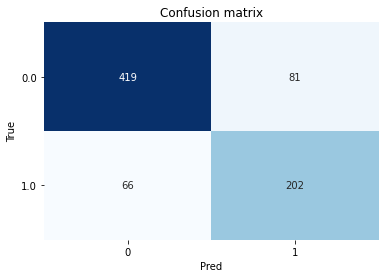

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
classes = np.unique(y)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y, predictions, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

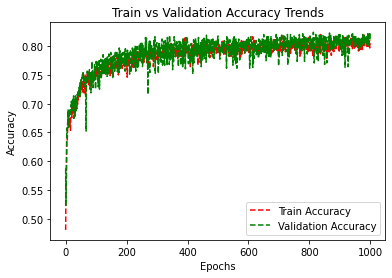

In [ ]:
# train and validation accuracy trends
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = [i for i in range(0, 1000)]
plt.plot(epochs, train_accuracy, 'r--', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'g--', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
jovian.commit(project="practical-4")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-4


'https://jovian.ai/rameshbhutka11/practical-4'